# Objective:
# Implement the Singular Value Decomposition from scratch and apply it to two real-world problems: image compression and recommendation systems. You may use libraries for matrix manipulation (e.g., NumPy), but not for SVD computation—you must implement the algorithm manually.

**Part 1: Implementing SVD**


1.Write a Python function my_svd(A) that computes the SVD of a matrix A without

using any linear algebra libraries (like numpy.linalg.svd).

**Your implementation should:**

1.Compute the eigenvalues and eigenvectors of AᵀA to get V and Σ

2.Derive U from A, V, and Σ

3.Handle both rectangular and square matrices

4.Include appropriate checks for numerical stability

5.Test your function on small matrices (2x2, 3x3) and compare with numpy's implementation.





In [5]:
import numpy as np

def my_svd(A, tol=1e-10):
    A = np.array(A, dtype=float)  # Ensure it's a float array (real values)
    m, n = A.shape
    AtA = A.T @ A
    eigvals, V = np.linalg.eig(AtA)
    eigvals = np.real(eigvals)
    V = np.real(V)
    sorted_idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[sorted_idx]
    V = V[:, sorted_idx]
    eigvals_clipped = np.clip(eigvals, 0, None)
    singular_values = np.sqrt(eigvals_clipped)
    Σ = np.zeros((m, n))
    for i in range(min(m, n)):
        if singular_values[i] > tol:
            Σ[i, i] = singular_values[i]
    U = np.zeros((m, m))
    for i in range(min(m, n)):
        if singular_values[i] > tol:
            U[:, i] = A @ V[:, i] / singular_values[i]
    for i in range(min(m, n), m):
        vec = np.random.rand(m)
        for j in range(i):
            vec -= np.dot(vec, U[:, j]) * U[:, j]
        norm = np.linalg.norm(vec)
        if norm > tol:
            U[:, i] = vec / norm

    return U, Σ, V.T


In [6]:
def test_my_svd():


    for shape in [(2, 2), (3, 3), (4, 3), (3, 4)]:
        A = np.random.randn(*shape)
        print(f"\nTesting shape: {shape}")
        U, S, Vt = my_svd(A)
        U_np, S_np, Vt_np = np.linalg.svd(A)
        A_recon = U @ S @ Vt

        k = min(A.shape)
        A_np_recon = U_np[:, :k] @ np.diag(S_np[:k]) @ Vt_np[:k, :]

        print("Original A:\n", A)
        print("Manual SVD:\n", A_recon)
        print("NumPy SVD:\n", A_np_recon)
        print("Difference (Manual - Original) SVD :", np.linalg.norm(A - A_recon))

test_my_svd()



Testing shape: (2, 2)
Original A:
 [[ 0.31188181  1.14848252]
 [ 1.2055718  -1.06856842]]
Manual SVD:
 [[ 0.31188181  1.14848252]
 [ 1.2055718  -1.06856842]]
NumPy SVD:
 [[ 0.31188181  1.14848252]
 [ 1.2055718  -1.06856842]]
Difference (Manual - Original) SVD : 5.551115123125783e-17

Testing shape: (3, 3)
Original A:
 [[ 0.1347948  -0.58039251  0.54306559]
 [-0.66984937  0.86035973  1.91284667]
 [ 0.43756586 -0.21044698 -0.410409  ]]
Manual SVD:
 [[ 0.1347948  -0.58039251  0.54306559]
 [-0.66984937  0.86035973  1.91284667]
 [ 0.43756586 -0.21044698 -0.410409  ]]
NumPy SVD:
 [[ 0.1347948  -0.58039251  0.54306559]
 [-0.66984937  0.86035973  1.91284667]
 [ 0.43756586 -0.21044698 -0.410409  ]]
Difference (Manual - Original) SVD : 1.6319239955030595e-15

Testing shape: (4, 3)
Original A:
 [[ 1.55888598  0.45585414 -1.15891682]
 [-1.77031328 -1.02316277 -0.84372023]
 [-0.23137749 -0.62222326  0.71756296]
 [-1.09537244 -1.38567026 -0.58847115]]
Manual SVD:
 [[ 1.55888598  0.45585414 -1.15891

##Visual Analysis##


Shape: (2, 2)
Manual error: 2.4866521324258985e-16
NumPy error: 6.938893903907228e-18

Shape: (3, 3)
Manual error: 4.997930709674e-16
NumPy error: 1.0068810866857322e-15

Shape: (4, 3)
Manual error: 2.9413381143931586e-15
NumPy error: 1.488550436168528e-15

Shape: (3, 4)
Manual error: 7.28550816809042e-16
NumPy error: 9.945640348601413e-16

Shape: (5, 5)
Manual error: 3.124382901649723e-15
NumPy error: 2.181595305864435e-15

Shape: (6, 6)
Manual error: 4.581416194800202e-15
NumPy error: 6.696360678699716e-15


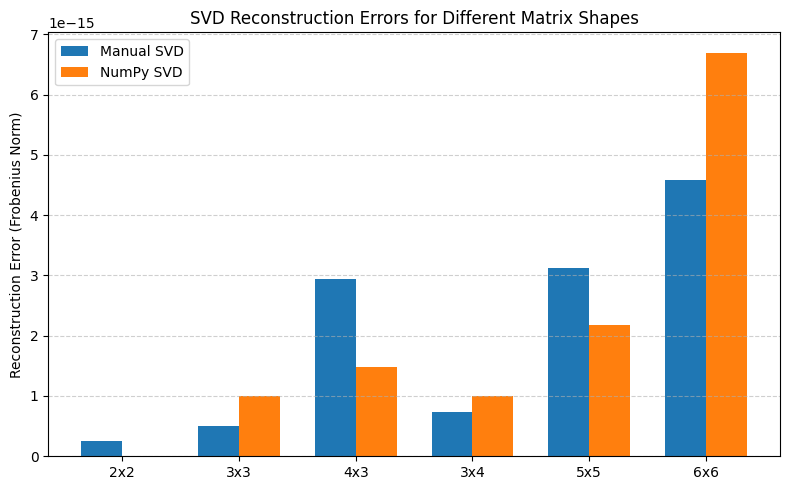

In [7]:
import matplotlib.pyplot as plt

def test_my_svd_with_plot():
    shapes = [(2, 2), (3, 3), (4, 3), (3, 4), (5, 5), (6, 6)]
    manual_errors = []
    numpy_errors = []
    labels = []

    for shape in shapes:
        A = np.random.randn(*shape)
        U, S, Vt = my_svd(A)
        U_np, S_np, Vt_np = np.linalg.svd(A)

        A_recon = U @ S @ Vt
        k = min(A.shape)
        A_np_recon = U_np[:, :k] @ np.diag(S_np[:k]) @ Vt_np[:k, :]

        manual_err = np.linalg.norm(A - A_recon)
        numpy_err = np.linalg.norm(A - A_np_recon)

        manual_errors.append(manual_err)
        numpy_errors.append(numpy_err)
        labels.append(f"{shape[0]}x{shape[1]}")

        print(f"\nShape: {shape}")
        print("Manual error:", manual_err)
        print("NumPy error:", numpy_err)

    x = np.arange(len(labels))
    width = 0.35

    plt.figure(figsize=(8, 5))
    plt.bar(x - width/2, manual_errors, width, label='Manual SVD')
    plt.bar(x + width/2, numpy_errors, width, label='NumPy SVD')

    plt.ylabel('Reconstruction Error (Frobenius Norm)')
    plt.title('SVD Reconstruction Errors for Different Matrix Shapes')
    plt.xticks(x, labels)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

test_my_svd_with_plot()


**Part 2: Applications of SVD **

**Principal Component Analysis :**

1.Implement PCA using your SVD function.

2.Apply it to the Iris dataset and visualize the data projected onto the first two principal components.

3.Compare your results with sklearn's PCA implementation.


---



**Image Compression :**

1.Select a grayscale image (at least 256x256 pixels).

2.Write a function that compresses the image using truncated SVD at different compression levels (k=5, 10, 20, 50).

3.Display the original and compressed images side by side with their compression ratios and PSNR values.


---


**Recommendation System :**

1.Implement a simple movie recommendation system using SVD on the MovieLens 100k dataset.

2.Show how predictions change as you vary the number of singular values used.

In [8]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA as SklearnPCA

def pca_my_svd(X, n_components=2):
    X_centered = X - np.mean(X, axis=0)
    U, S, Vt = my_svd(X_centered)
    return X_centered @ Vt.T[:, :n_components]


In [9]:
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
X_pca_custom = pca_my_svd(X, n_components=2)
sk_pca = SklearnPCA(n_components=2)
X_pca_sklearn = sk_pca.fit_transform(X)

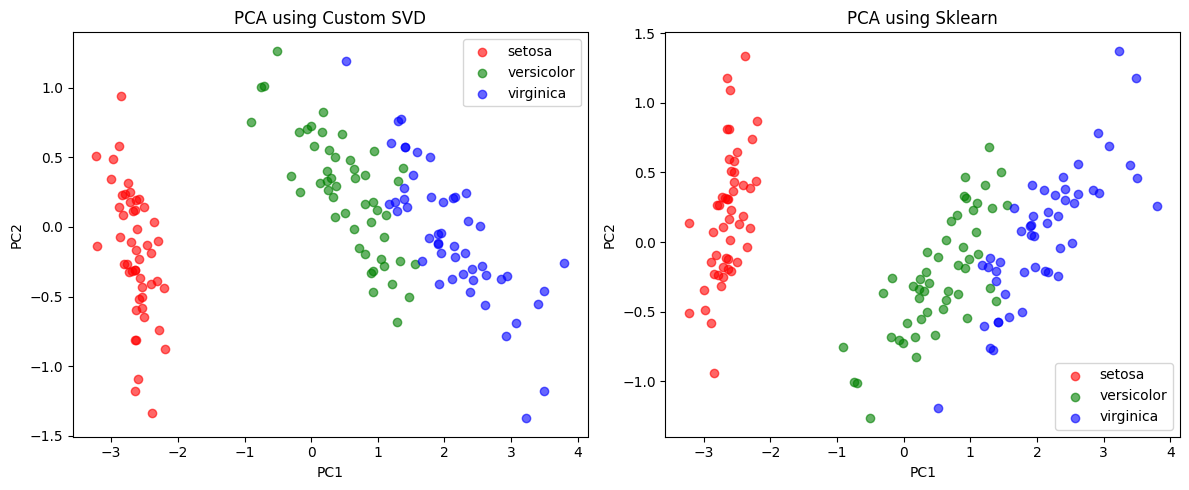

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

colors = ['red', 'green', 'blue']
for i, target_name in enumerate(target_names):
    axes[0].scatter(X_pca_custom[y == i, 0], X_pca_custom[y == i, 1],
                    label=target_name, color=colors[i], alpha=0.6)
axes[0].set_title("PCA using Custom SVD")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].legend()

for i, target_name in enumerate(target_names):
    axes[1].scatter(X_pca_sklearn[y == i, 0], X_pca_sklearn[y == i, 1],
                    label=target_name, color=colors[i], alpha=0.6)
axes[1].set_title("PCA using Sklearn")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
axes[1].legend()

plt.tight_layout()
plt.show()


##Image Compression##

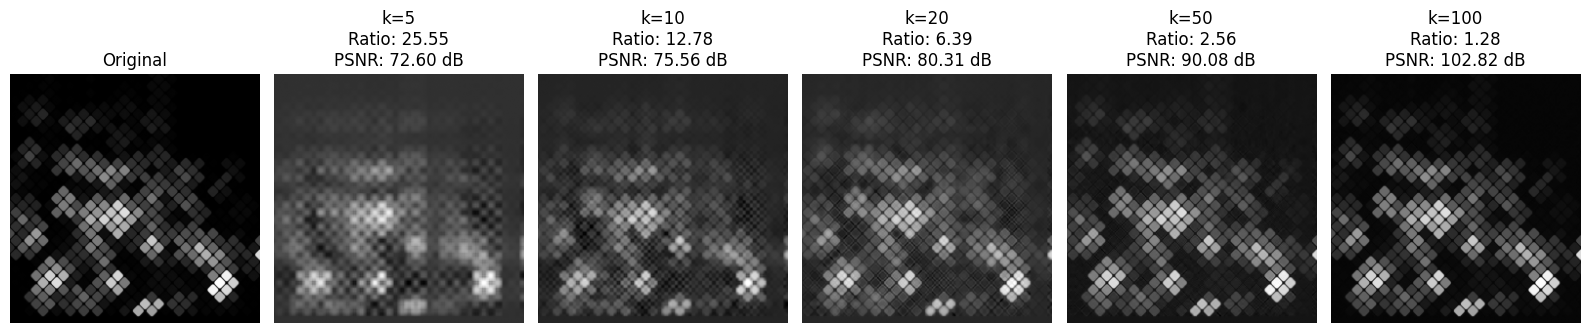

In [11]:
from skimage import data, color
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.io import imread
from skimage.transform import resize
from skimage.metrics import peak_signal_noise_ratio as psnr

def compress_image_svd(img, k):
    U, S, Vt = my_svd(img)
    U_k = U[:, :k]
    S_k = S[:k, :k]
    Vt_k = Vt[:k, :]
    img_compressed = U_k @ S_k @ Vt_k
    return img_compressed

def compression_ratio(m, n, k):
    return (m * n) / (k * (1 + m + n))

def show_compression(img, ks):
    fig, axes = plt.subplots(1, len(ks) + 1, figsize=(16, 6))
    axes[0].imshow(img, cmap='gray')
    axes[0].set_title("Original")
    axes[0].axis('off')

    m, n = img.shape

    for i, k in enumerate(ks):
        img_k = compress_image_svd(img, k)
        ratio = compression_ratio(m, n, k)
        psnr_val = psnr(img, img_k)

        axes[i + 1].imshow(img_k, cmap='gray')
        axes[i + 1].set_title(f"k={k}\nRatio: {ratio:.2f}\nPSNR: {psnr_val:.2f} dB")
        axes[i + 1].axis('off')

    plt.tight_layout()
    plt.show()


img = imread('/content/dotbg.jpg', as_gray=True)
img = resize(img, (256, 256))
img = img / 255.0

show_compression(img, ks=[5, 10, 20, 50, 100])


##Popular Images Testing##


 Compressing image: camera


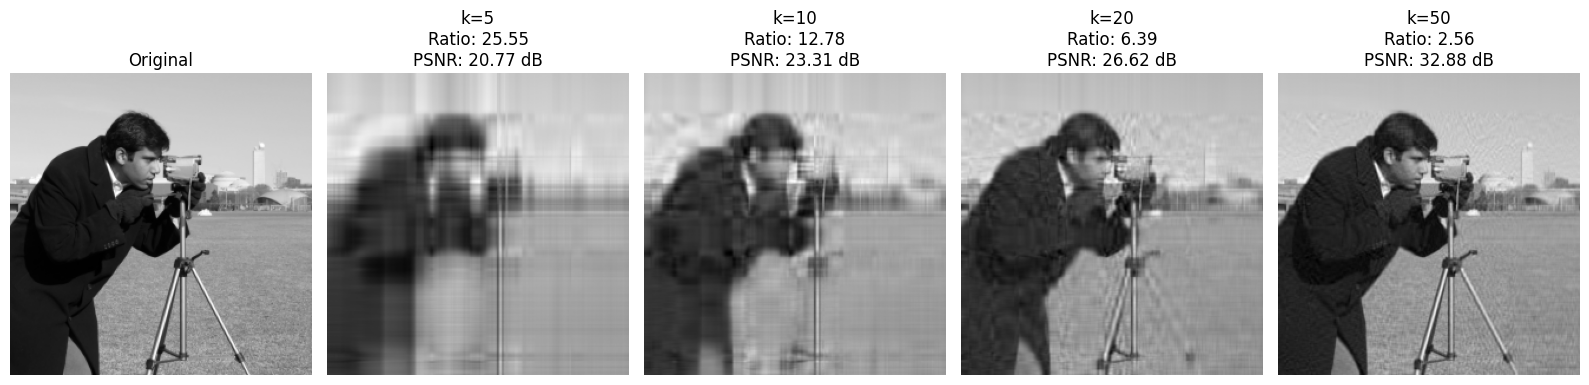


 Compressing image: moon


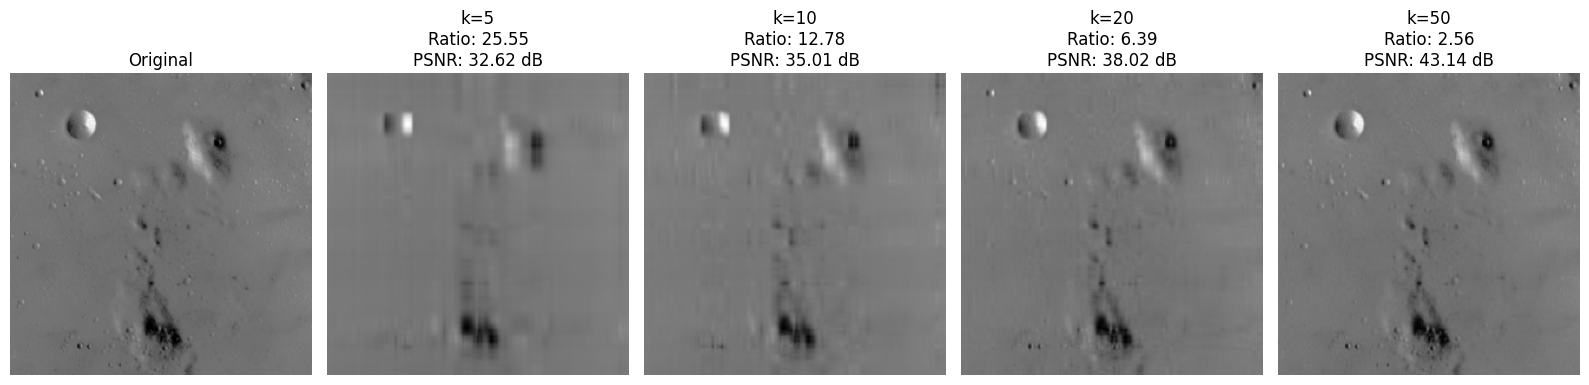


 Compressing image: coins


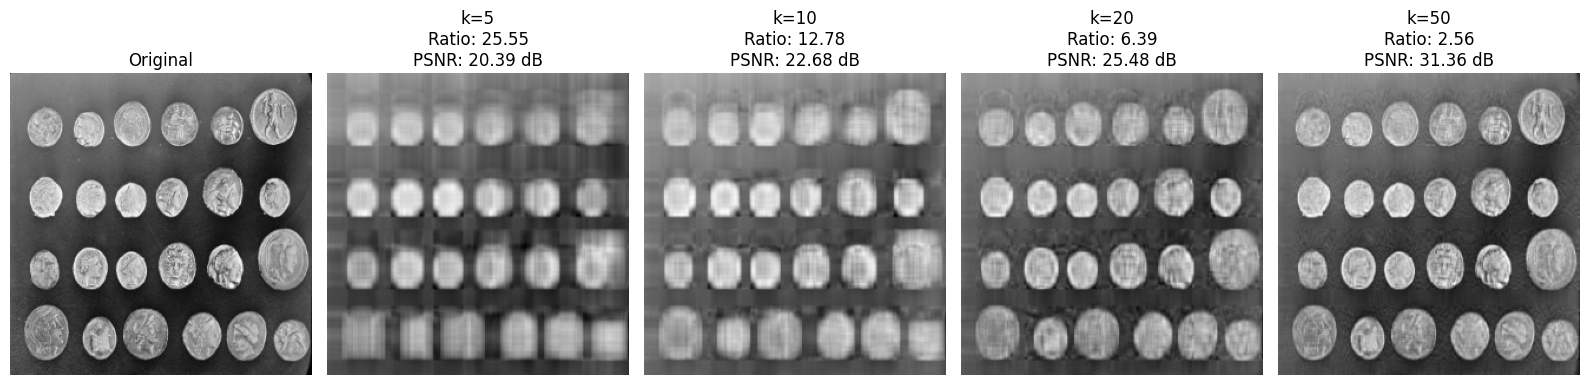

In [12]:
from skimage import data, img_as_float
from skimage.transform import resize

images = {
    "camera": img_as_float(data.camera()),
    "moon": img_as_float(data.moon()),
    "coins": img_as_float(data.coins()),
}

for name, img in images.items():
    print(f"\n Compressing image: {name}")
    img_resized = resize(img, (256, 256))
    show_compression(img_resized, ks=[5, 10, 20, 50])


##CIFAR Dataset##


CIFAR-10 Image #1


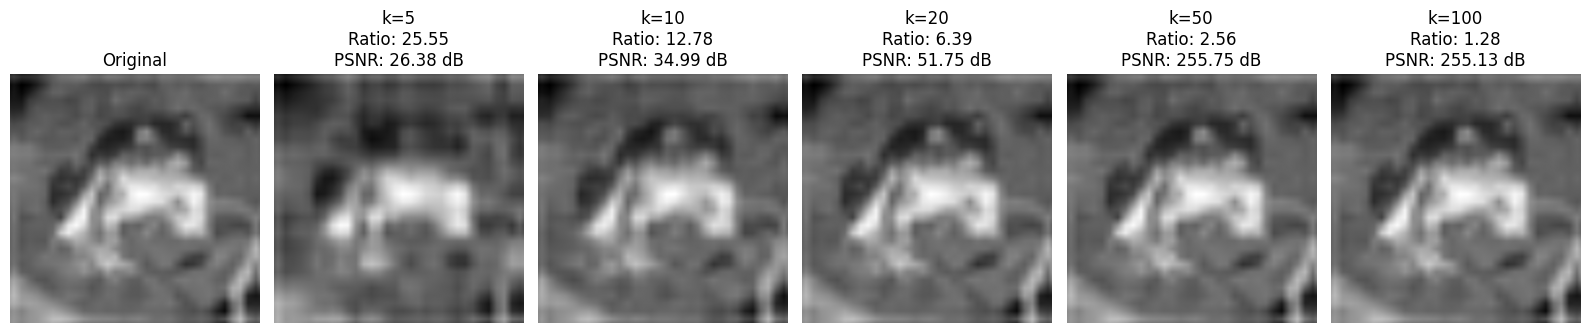


CIFAR-10 Image #2


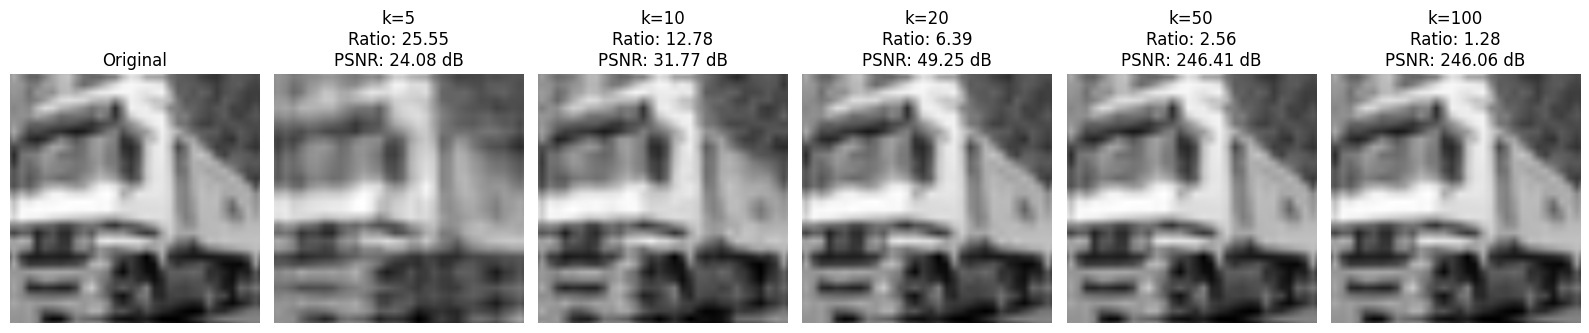


CIFAR-10 Image #3


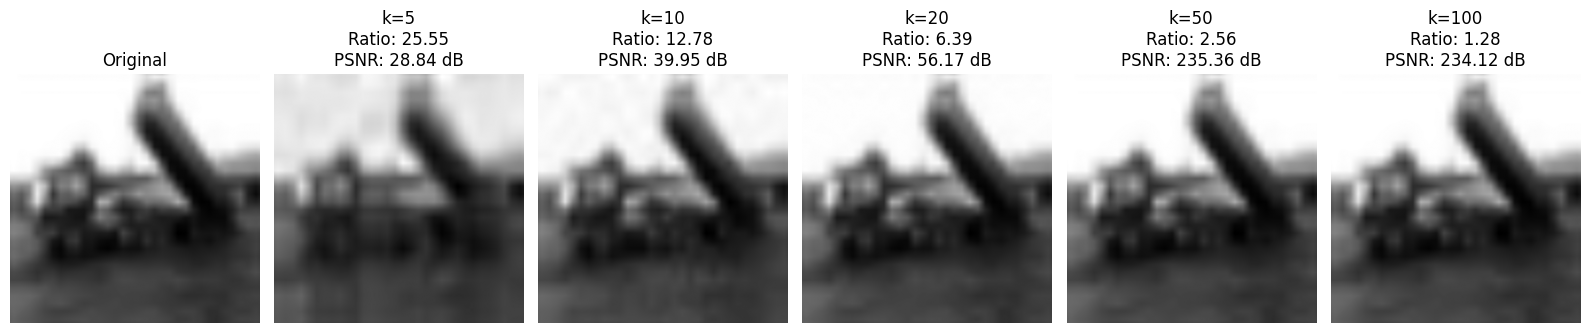


CIFAR-10 Image #4


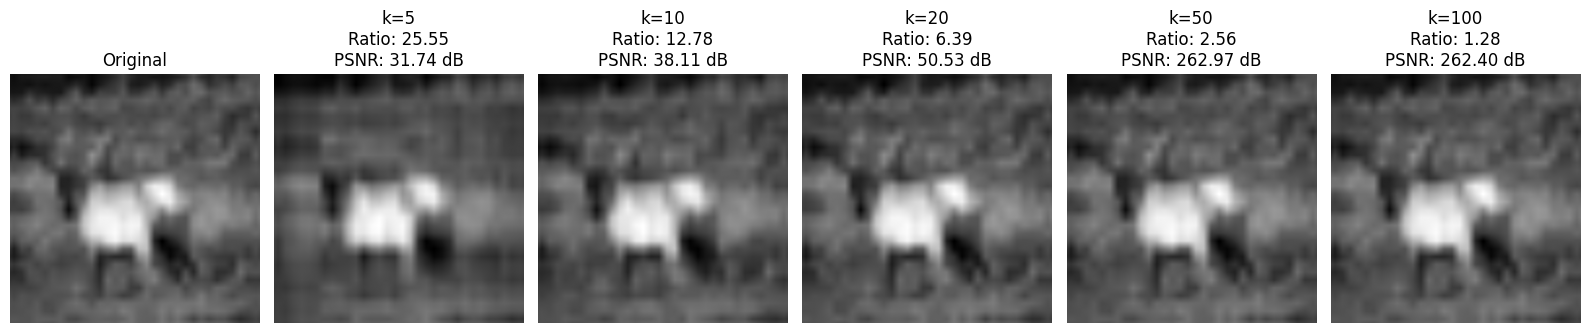


CIFAR-10 Image #5


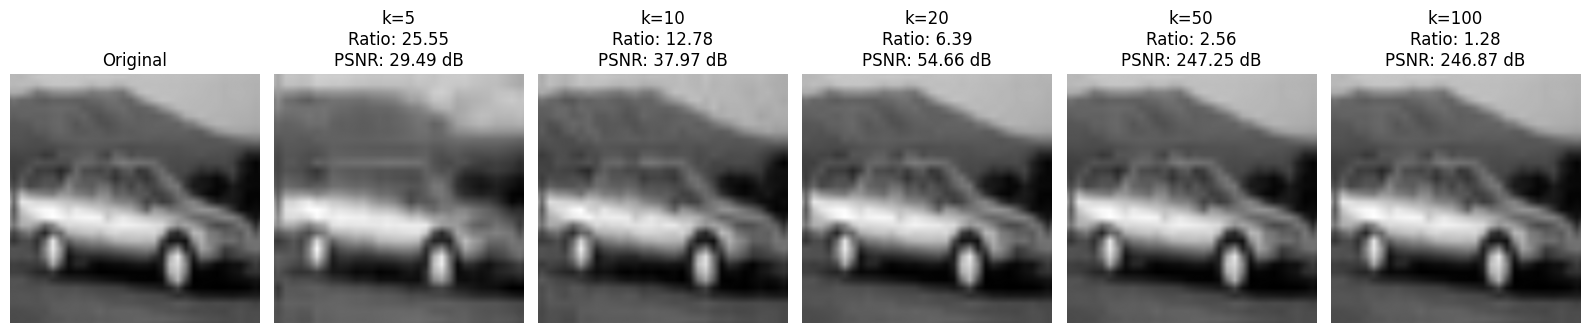


CIFAR-10 Image #6


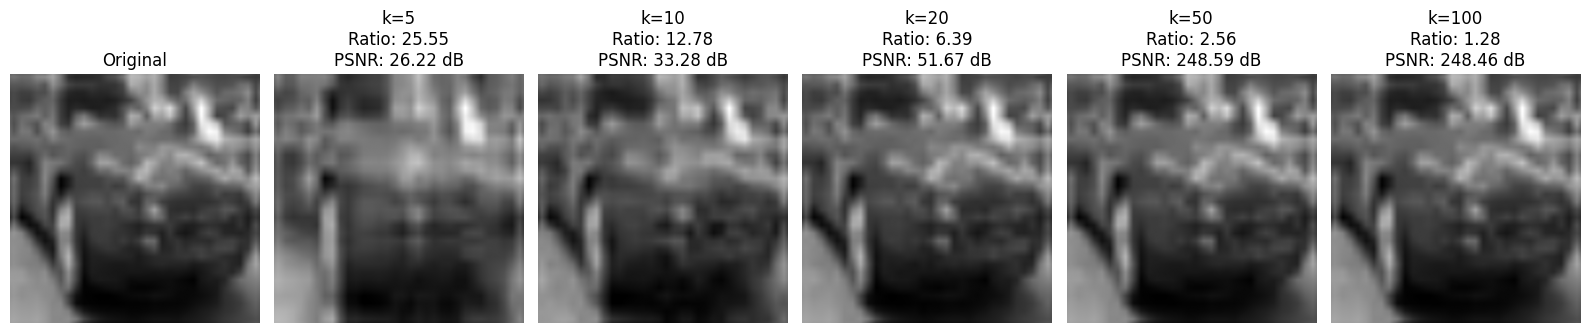


CIFAR-10 Image #7


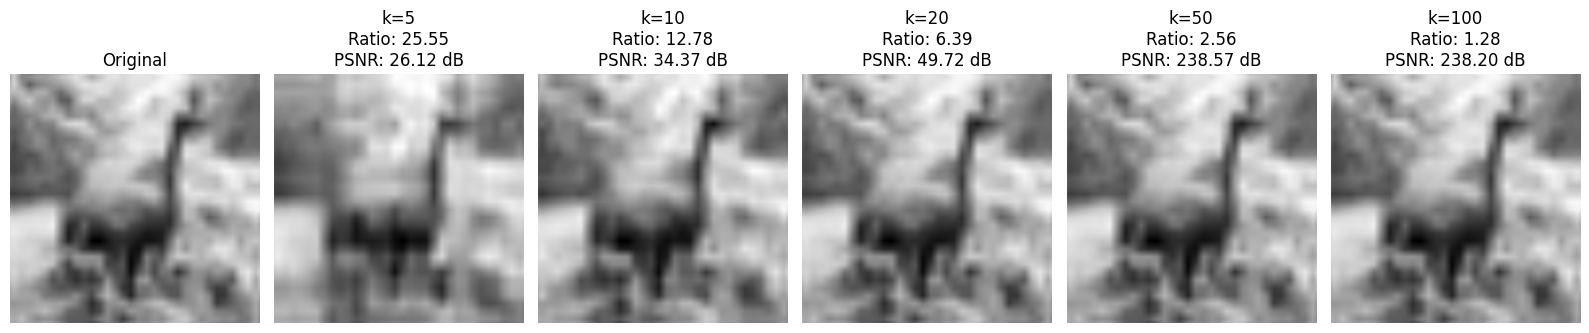


CIFAR-10 Image #8


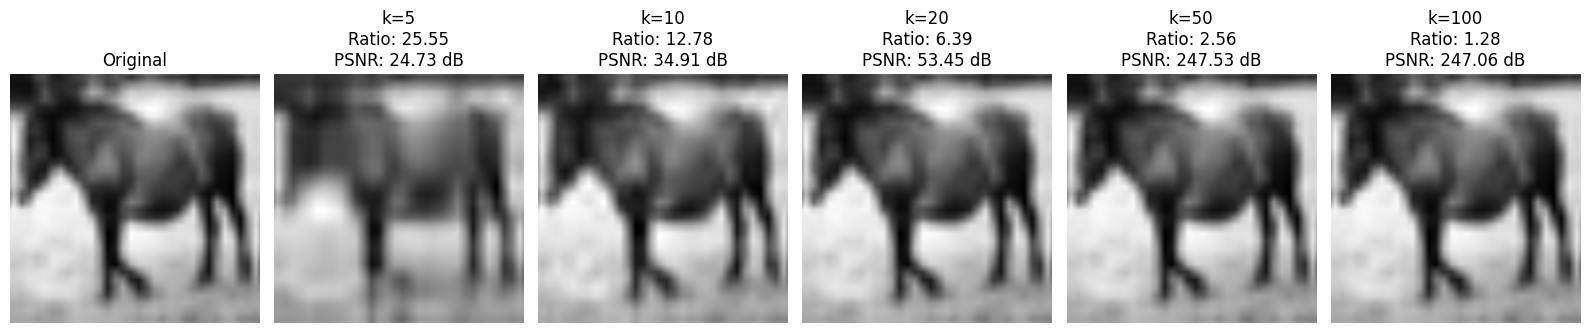


CIFAR-10 Image #9


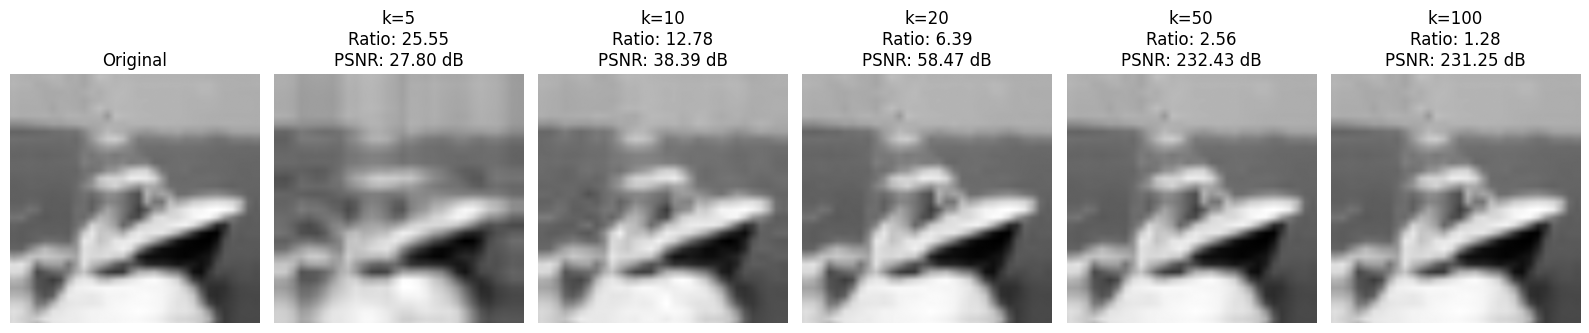


CIFAR-10 Image #10


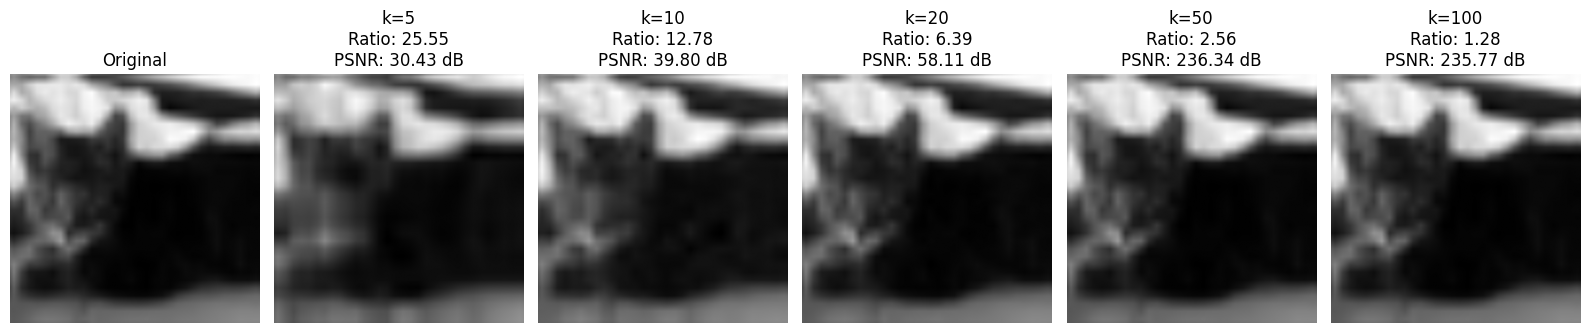

In [13]:
import torch
from torchvision import datasets, transforms
from torchvision.transforms.functional import to_pil_image
from skimage.color import rgb2gray
from skimage.transform import resize

transform = transforms.Compose([
    transforms.ToTensor()
])

cifar = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)


num_images = 10
for i in range(num_images):
    img_tensor, _ = cifar[i]
    img_rgb = to_pil_image(img_tensor)
    img_gray = rgb2gray(np.array(img_rgb))
    img_gray_resized = resize(img_gray, (256, 256))

    print(f"\nCIFAR-10 Image #{i+1}")
    show_compression(img_gray_resized, ks=[5, 10, 20, 50,100])


##Recommender System##

RMSE for k=5: 0.0966
RMSE for k=10: 0.2714
RMSE for k=20: 0.6744
RMSE for k=50: 0.9654
RMSE for k=100: 1.0308

Top 10 recommended movies for User 10 (k=10):
Movie ID: 100, Predicted Rating: 5.15
Movie ID: 180, Predicted Rating: 5.13
Movie ID: 185, Predicted Rating: 5.11
Movie ID: 483, Predicted Rating: 5.09
Movie ID: 50, Predicted Rating: 5.09
Movie ID: 127, Predicted Rating: 5.06
Movie ID: 498, Predicted Rating: 4.99
Movie ID: 357, Predicted Rating: 4.98
Movie ID: 197, Predicted Rating: 4.96
Movie ID: 132, Predicted Rating: 4.95


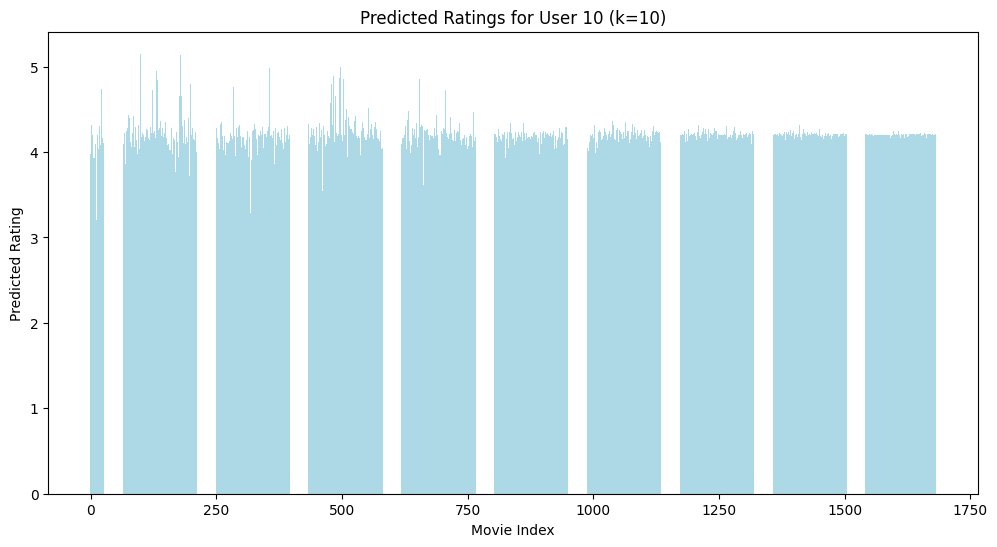

In [14]:
import pandas as pd
from sklearn.metrics import mean_squared_error

ratings = pd.read_csv('/content/u.data', sep='\t', header=None)
ratings.columns = ['userId', 'movieId', 'rating', 'timestamp']

user_movie_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating')
user_movie_matrix_centered = user_movie_matrix.subtract(user_movie_matrix.mean(axis=1), axis=0)
user_movie_matrix_filled = user_movie_matrix_centered.fillna(0)

def svd_recommendation_system(ratings_matrix, k):
    U, Σ, Vt = my_svd(ratings_matrix, k)
    reconstructed_matrix = np.dot(np.dot(U, Σ), Vt)
    return reconstructed_matrix

def evaluate_svd(k):
    reconstructed_matrix = svd_recommendation_system(user_movie_matrix_filled, k)
    predicted_ratings = reconstructed_matrix + user_movie_matrix.mean(axis=1).values.reshape(-1, 1)
    actual_ratings = user_movie_matrix.values
    mask = ~np.isnan(actual_ratings)
    rmse = np.sqrt(mean_squared_error(actual_ratings[mask], predicted_ratings[mask]))
    return rmse, predicted_ratings

def visualize_recommendations(k, user_id=10, top_n=10):

    _, predicted_ratings = evaluate_svd(k)

    user_ratings = predicted_ratings[user_id - 1, :]

    sorted_movie_indices = np.argsort(user_ratings)[::-1]

    top_movies = sorted_movie_indices[:top_n]

    print(f"\nTop {top_n} recommended movies for User {user_id} (k={k}):")
    for idx in top_movies:
        print(f"Movie ID: {idx + 1}, Predicted Rating: {user_ratings[idx]:.2f}")

    plt.figure(figsize=(12, 6))
    plt.bar(range(len(user_ratings)), user_ratings, color='lightblue')
    plt.title(f"Predicted Ratings for User {user_id} (k={k})")
    plt.xlabel('Movie Index')
    plt.ylabel('Predicted Rating')
    plt.show()

k_values = [5, 10, 20, 50, 100]
for k in k_values:
    rmse, _ = evaluate_svd(k)
    print(f"RMSE for k={k}: {rmse:.4f}")
visualize_recommendations(k=10, user_id=10, top_n=10)


In [18]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # Male=1, Female=0
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])
X = df[features].values
y = df[target].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<ipython-input-18-b80b84c7d022>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-18-b80b84c7d022>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

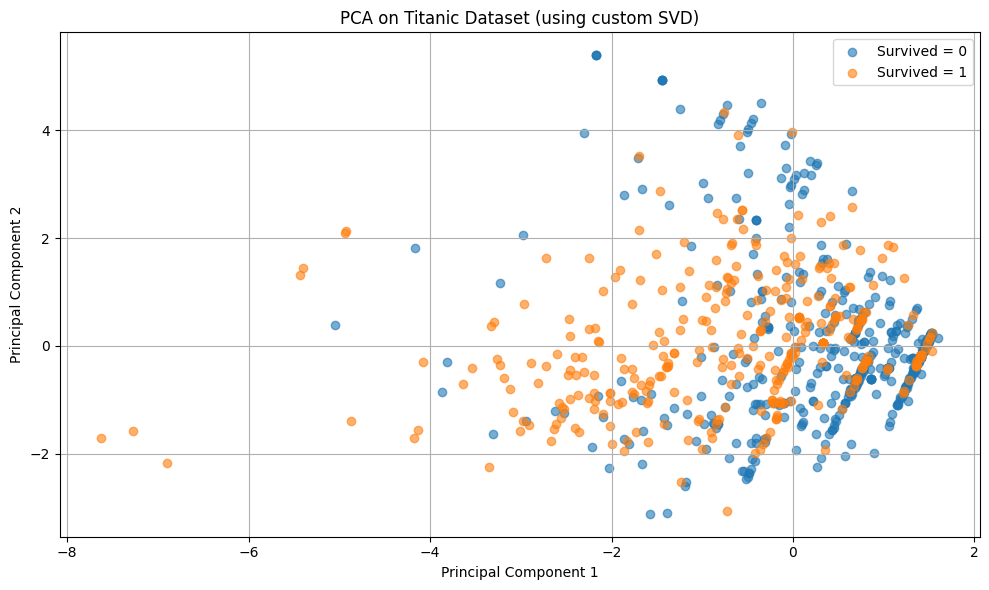

In [19]:
X_pca = pca_my_svd(X_scaled, n_components=2)

plt.figure(figsize=(10, 6))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1],
                label=f"Survived = {label}", alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on Titanic Dataset (using custom SVD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Submission Requirements**


> **A well-documented Jupyter notebook containing:**



1.All your implementations

2.Test cases and results

3.Visualizations where applicable

4.Performance analysis


---




>  **A short report (Latex) summarizing**



1.Your implementation approach

2.Key findings from the experiments

3.Challenges faced and how you addressed them